<a href="https://colab.research.google.com/github/junyong838/-/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

인공지능 HW #4

이름: 최준용

학번: 202310991

학과: 컴퓨터과학과

In [3]:
import numpy as np
from numpy.random import randn
def unpickle(file):
  import pickle
  with open('/content/drive/MyDrive/인공지능/cifar-10-batches-py/'+file,'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
  return dict

bat1 = unpickle('data_batch_1')
bat2 = unpickle('data_batch_2')
bat3 = unpickle('data_batch_3')
bat4 = unpickle('data_batch_4')
bat5 = unpickle('data_batch_5')
bat_test = unpickle('test_batch')
data = np.concatenate([bat1[b'data'], bat2[b'data'],
bat3[b'data'],bat4[b'data'], bat5[b'data']])
labels = np.concatenate([bat1[b'labels'],
bat2[b'labels'], bat3[b'labels'],bat4[b'labels'],
bat5[b'labels']])

t_data = bat1[b'data'].astype("float")
labels = np.array(bat1[b'labels'])
labels = labels[:, np.newaxis]
N, D_in = np.shape(t_data)
H, D_out = 500, 10
t_label = np.zeros((N,D_out))
for i in range(N):
  t_label[i,labels[i]]=1
w1, w2 = randn(D_in, H)*0.01, randn(H, D_out)*0.01
test_data = bat_test[b'data']
test_label = bat_test[b'labels']

In [5]:
def sigmoid(x : np.ndarray) -> np.ndarray:
  positives = x >= 0
  negatives = ~positives
  exp_x_neg = np.exp(x[negatives])
  y = x.copy()
  y[positives] = 1 / (1 + np.exp(-x[positives]))
  y[negatives] = exp_x_neg / (1 + exp_x_neg)
  return y


In [ ]:
index = 0
epoch = 20
minibatch = [100, 200,1000]
loss_array = np.zeros((len(minibatch)+1, epoch))

for mini_batch in minibatch:
  for t in range(epoch):
    d_shuffle = np.hstack((t_data, labels, t_label))
    np.random.shuffle(d_shuffle)
    rt_data = d_shuffle[:, 0:3072]
    rlabels = d_shuffle[:, 3072].ravel().astype(int)
    rt_label = d_shuffle[:, 3073:]
    for b in range(int(10000/mini_batch)):
      mini_t_data = rt_data[b*mini_batch:(b+1)*mini_batch,:]
      mini_labels = rlabels[b*mini_batch:(b+1)*mini_batch]
      mini_t_label = rt_label[b*mini_batch:(b+1)*mini_batch,:]
      z = np.dot(mini_t_data,w1)
      z -= np.max(z)
      h = sigmoid(z)
      z = h.dot(w2)
      z_max = np.max(z, axis=1)
      z -= z_max[:,None]
      exp_s = np.exp(z)
      exp_y_s = exp_s[range(len(mini_labels)),mini_labels]
      ti = exp_s / np.sum(exp_s, axis = 1)[:,None]
      loss_i = -np.log(exp_y_s/np.sum(exp_s, axis = 1))
      loss = np.sum(loss_i)
      grad_s = ti-mini_t_label
      grad_w2 = h.T.dot(grad_s)
      grad_h = grad_s.dot(w2.T)
      grad_w1 = mini_t_data.T.dot(grad_h * h * (1-h))

      lr = 1e-4
      w1 -= lr * grad_w1
      w2 -= lr * grad_w2
    loss_array[index, t] = loss
  index += 1

In [ ]:
for t in range(20):
  z = np.dot(t_data,w1)
  z -= np.max(z)
  h = sigmoid(z)
  z = h.dot(w2)
  z_max = np.max(z, axis=1)
  z -= z_max[:,None]
  exp_s = np.exp(z)
  exp_y_s = exp_s[range(len(labels)),labels]
  ti = exp_s / np.sum(exp_s, axis = 1)[:,None]
  loss_i = -np.log(exp_y_s/np.sum(exp_s, axis = 1))
  loss = np.sum(loss_i)
  grad_s = ti-t_label
  grad_w2 = h.T.dot(grad_s)
  grad_h = grad_s.dot(w2.T)
  grad_w1 = t_data.T.dot(grad_h * h * (1-h))
  lr = 1e-4
  w1 -= lr * grad_w1
  w2 -= lr * grad_w2
  loss_array[index, t] = loss

GD 방식은 모든 학습데이터에 대하여 loss를 구하고 기울기를 구한 후, 한번 움직이는 방식으로 학습하는 것이다.1 epoch을 돌아야 기울기를 조정하기 때문에 한번 움직이는데에 들어가는 시간이 더 크다.

minibatch를 이용해 샘플링한 데이터들을 바탕으로 기울기와 loss를 구하는 SGD 방식은 비교적 정확하지 않을 수 있지만 더 빠르게 기울기를 구해나갈 수 있다는 장점이 있다.

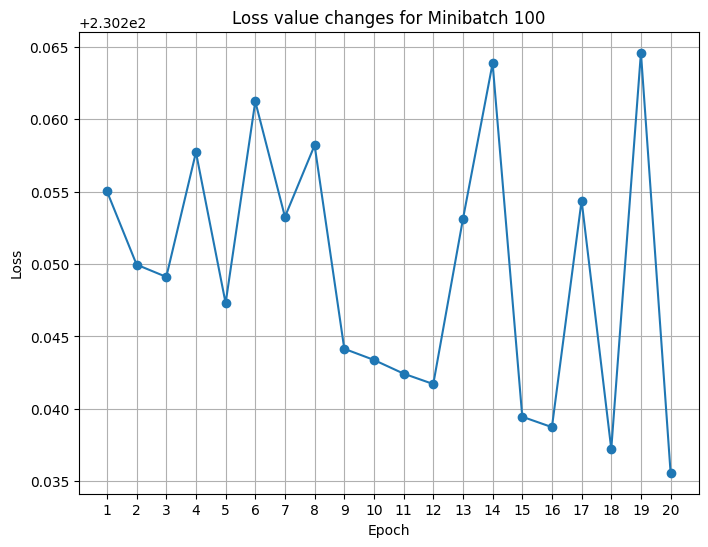

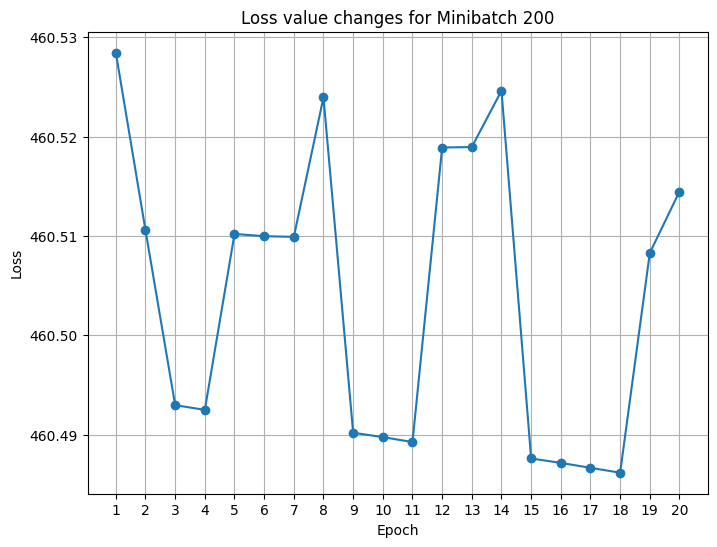

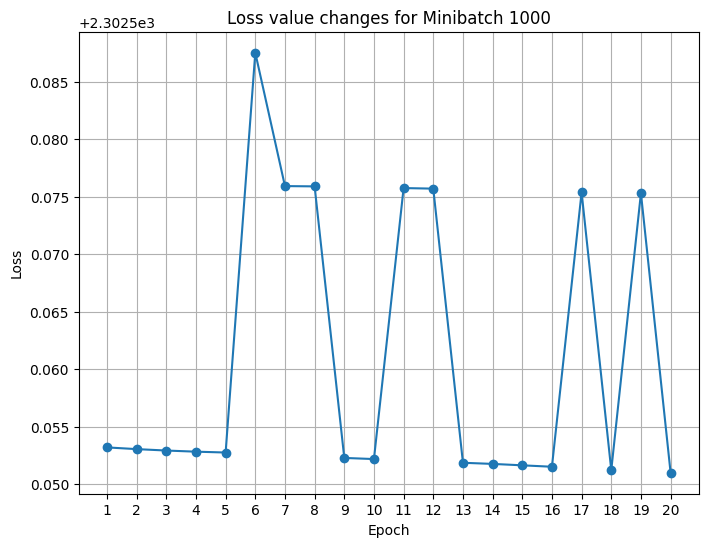

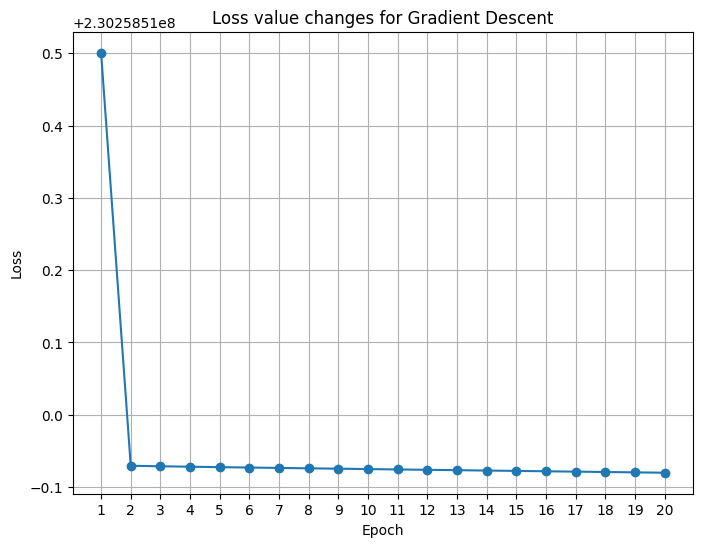

In [ ]:
import matplotlib.pyplot as plt

labels_s = ['Minibatch 100', 'Minibatch 200', 'Minibatch 1000', 'Gradient Descent']

epochs = np.arange(1, 21)

for i in range(4):
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, loss_array[i], marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss value changes for {labels_s[i]}')
    plt.xticks(epochs)
    plt.grid(True)
    plt.show()



In [6]:
epoch = 20
Loss_array = np.zeros((2,epoch))
for t in range(epoch):
  z = np.dot(t_data,w1)
  z -= np.max(z)
  h = sigmoid(z)
  y_pred = h.dot(w2)
  loss = np.square(y_pred - t_label).sum()
  Loss_array[0,t] = loss
  grad_y_pred = 2.0 * (y_pred - t_label)
  grad_w2 = h.T.dot(grad_y_pred)
  grad_h = grad_y_pred.dot(w2.T)
  grad_w1 = t_data.T.dot(grad_h * h * (1-h))
  lr = 1e-4
  w1 -= lr * grad_w1
  w2 -= lr * grad_w2

In [10]:
mini_batch = 100
velo1 = velo2 = 0
w1, w2 = randn(D_in, H)*0.01, randn(H, D_out)*0.01
for t in range(epoch):
  d_shuffle = np.hstack((t_data, labels, t_label))
  np.random.shuffle(d_shuffle)
  rt_data = d_shuffle[:, 0:3072]
  rlabels = d_shuffle[:, 3072].ravel().astype(int)
  rt_label = d_shuffle[:, 3073:]
  for b in range(int(10000/mini_batch)):
    mini_t_data = rt_data[b*mini_batch:(b+1)*mini_batch,:]
    mini_labels = rlabels[b*mini_batch:(b+1)*mini_batch]
    mini_t_label = rt_label[b*mini_batch:(b+1)*mini_batch,:]
    z = np.dot(mini_t_data,w1)
    z -= np.max(z)
    h = sigmoid(z)
    z = h.dot(w2)
    z_max = np.max(z, axis=1)
    z -= z_max[:,None]
    exp_s = np.exp(z)
    exp_y_s = exp_s[range(len(mini_labels)),mini_labels]
    ti = exp_s / np.sum(exp_s, axis = 1)[:,None]
    loss_i = -np.log(exp_y_s/np.sum(exp_s, axis = 1))
    loss = np.sum(loss_i)
    grad_s = ti-mini_t_label
    grad_w2 = h.T.dot(grad_s)
    grad_h = grad_s.dot(w2.T)
    grad_w1 = mini_t_data.T.dot(grad_h * h * (1-h))

    lr = 1e-6
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2
  Loss_array[1,t] = loss


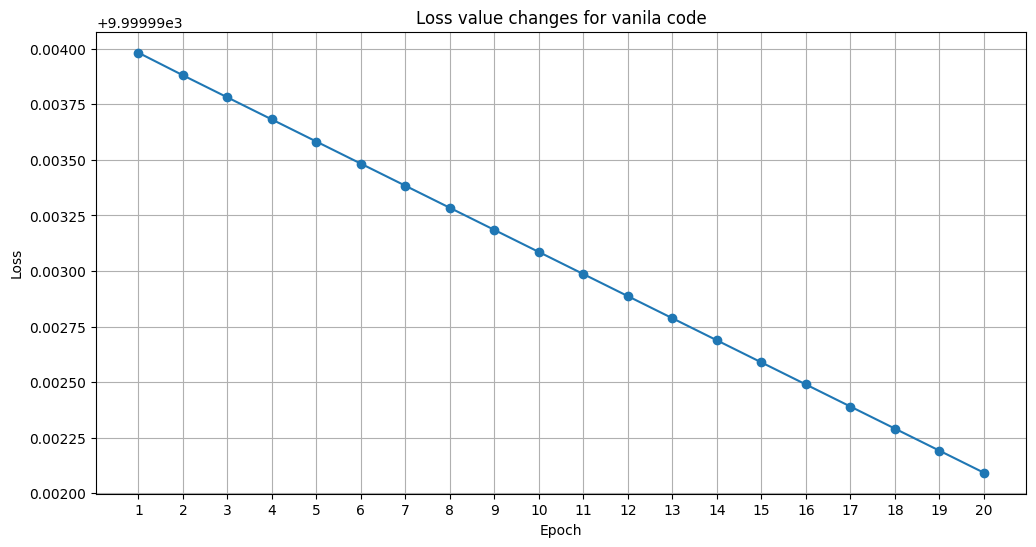

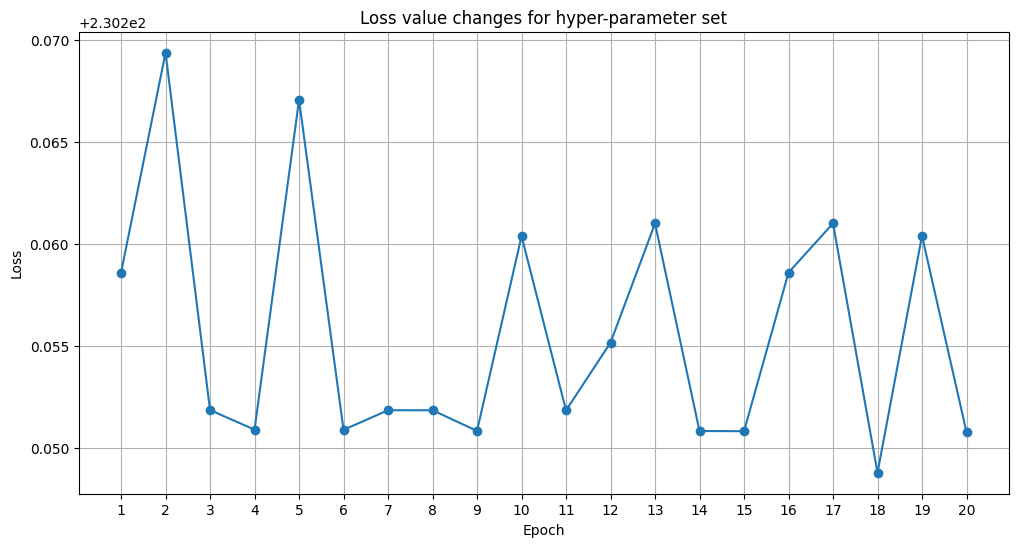

In [11]:
import matplotlib.pyplot as plt

labels_s = ['vanila code', 'hyper-parameter set']

epochs = np.arange(1, epoch+1)

for i in range(2):
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, Loss_array[i], marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss value changes for {labels_s[i]}')
    plt.xticks(epochs)
    plt.grid(True)
    plt.show()

SGD minibatch: 100

lr: 1e-6